Nous allons voir dans ce notebook un exemple très basique d’une chaîne de Markov. Il s’agit de la **marche aléatoire**. Cet exemple est décrit plus en détail [ici](https://fr.wikipedia.org/wiki/Marche_al%C3%A9atoire#Marche_al%C3%A9atoire_discr%C3%A8te_%C3%A0_une_dimension). Pour plus d’information sur les marches aléatoires, vous pouvez lire la [page Wikipédia](https://fr.wikipedia.org/wiki/Marche_al%C3%A9atoire) dédiée à ce sujet. 

## Marche aléatoire discrète à une dimension

Imaginons un bonhomme qui marche sur une linge droite. À chaque pas il a deux choix possibles :

* Faire un pas en avant
* Faire un pas en arrière 

Pour choisir où aller il tire à pile ou face avec une pièce dont la probabilité de sortir pile est égale à $p$.

**Exercice 1:**  
Écrire une fonction en python permettant de simuler le chemin parcouru par le bonhomme. La fonction prendra en entrée la probabilité d’aller en avant (*p*) et le nombre de pas (*n*). La fonction donnera comme résultat une liste de taille n avec les endroits visités.


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

# Solution
def random_walk(p, n):
    visited_positions = [0]
    # Completer la fonction
    
    return visited_positions

**Exercice 2 :**  
Tracer le chemin parcouru par le bonhomme

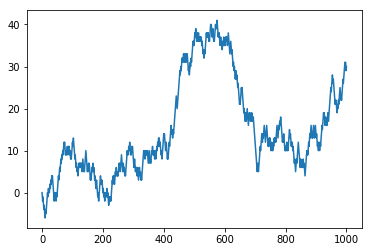

In [2]:
p = 0.5
n = 1000
visited_pos = random_walk(p, n)


**Exercice 3 :**  
Compter le nombre de fois où le bonhomme est passé par une position donnée.

In [3]:
position = 0
nb_visit_position = 0 # Completer ici
print("La position {} a été visitée {} fois".format(position, nb_visit_position))

La position 0 a été visitée 22 fois


## Modèle des urnes. Urnes d'Ehrenfest

Un autre exemple très populaire de chaîne de Markov est le [modèle des urnes d'Ehrenfest](https://fr.wikipedia.org/wiki/Mod%C3%A8le_des_urnes_d%27Ehrenfest). L’exemple est décrit comme ceci : 


On considère deux urnes *A* et *B*, ainsi que *N* boules, numérotées de *1* à *N*. Initialement, toutes les boules se trouvent dans l'urne *A*. Le processus stochastique associé consiste à répéter l'opération suivante :
Tirer au hasard un numéro *i* compris entre *1* et *N*, prendre la boule numéro *i*, la transférer dans l'urne où elle n'était pas.  
 Par convention, le premier instant est $\displaystyle t_{0}=0$.
 
 Dans ce modèle, on suit au cours du temps $t$ (discret) le nombre total de boules $n(t)$ présentes dans l'urne *A*.
 
**Exercice 4 :**  
Pour $N=4$ boules, faire le *diagramme* et la *matrice de transition* de la chaîne de Markov du modèle décrit.

*Solution*

Le diagramme de la chaîne est :

![diagramme](./images/urnes_diagram.jpg)

Si on prend l'ordre suivant pour les états : $\{4, 3, 2, 1, 0\}$, la matrice de transition est :

$$
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 \\ 
1/4 & 0 & 3/4 & 0 & 0 \\
0 & 0 & 1/2 & 1/2 & 0 \\
0 & 0 & 3/4 & 0 & 1/4 \\
0 & 0 & 0 & 1 & 0
\end{bmatrix}
$$


**Exercice 5 :**  
 Écrire une fonction en python permettant de suivre le nombre de boules dans l’urne A. La fonction prendra comme entrée le nombre total de boules *n_balls* et le nombre de répétitions *n_rep*.

In [4]:
# Solution
def urnes(n_balls, n_rep):
    n_balls_inA = [n_balls]
    
    # Completer ici
    
    return n_balls_inA


In [5]:
urnes(4, 10)

[4, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2]

**Exercice 6:**  
Tracer l'évolution du processus

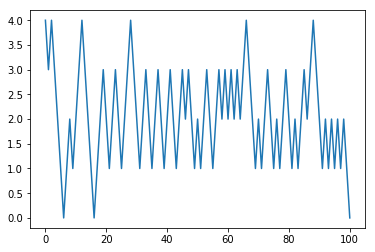

In [6]:
n_balls = 4
n_rep = 100
balls_inA = urnes(n_balls, n_rep)


## Comportement en temps long 

In [7]:
n_balls = 4
n_rep = 1000000
balls_inA = urnes(n_balls, n_rep)

n_visits = [balls_inA.count(i) for i in range(n_balls+1)]
freq = [float(n)/n_rep for n in n_visits]

In [8]:
freq

[0.062628, 0.250192, 0.375018, 0.249808, 0.062355]

In [9]:
transition_matrix = np.matrix([[0, 1, 0, 0, 0], 
                               [1./4, 0, 3./4, 0, 0],
                               [0, 1./2, 0, 1./2, 0],
                               [0, 0, 3./4, 0, 1./4],
                               [0, 0, 0, 1, 0]])

In [10]:
initial_state = np.array([1, 0, 0, 0, 0])
nb_step = 1000000
prob = [np.dot(initial_state, transition_matrix)]
for i in range(nb_step):
    prob.append(np.dot(prob[-1], transition_matrix))
inv_prob = np.true_divide(sum(prob), nb_step)

In [11]:
inv_prob

matrix([[0.06250017, 0.25000117, 0.375     , 0.24999983, 0.06249983]])

In [12]:
v, M = np.linalg.eig(transition_matrix.transpose())

In [13]:
v

array([ 1.0000000e+00, -1.0000000e+00, -5.0000000e-01,  1.3434836e-16,
        5.0000000e-01])

In [14]:
M[:, 0] / sum(M[:, 0])

matrix([[0.0625],
        [0.25  ],
        [0.375 ],
        [0.25  ],
        [0.0625]])